Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# lazy 
from lazypredict.Supervised import LazyClassifier
from sklearn.utils import all_estimators
from sklearn.base import ClassifierMixin

# search hyperparameters
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

# modèles 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier

import xgboost as xgb
import shap

# métriques 
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import classification_report,accuracy_score, f1_score, fbeta_score
from sklearn.metrics import make_scorer, confusion_matrix, precision_score, recall_score, precision_recall_curve

# Rééchantillonage
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from imblearn.under_sampling import RandomUnderSampler

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# sauvegarde model
import pickle

# import des fonctions de modélisations
import  modeling_functions as mf


# Modèle par location

In [2]:
# model par location
select_location = "Canberra"
# df_location = list()

# Choix des modèles (fixe pour l'instant) 
models_select  = {
    'LogisticRegression': LogisticRegression(max_iter = 500, n_jobs=-1),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1)
}

df_location =  pd.read_csv("../src/data_location_V2/df_" + select_location + ".csv", index_col=["id_Location","id_Date"])

#Setting the range for class weights
weights = np.linspace(0.0,0.99,5)
print(weights)
# Hyperparamètres à tester pour chaque modèle
param_grids1 = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 
                           'solver': ['liblinear', 'lbfgs', 'saga'],
                           'class_weight': [{0:x, 1:1.0-x} for x in weights]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 
                               'max_depth': [10, 20, 30],
                               'criterion':['gini', 'entropy', 'log_loss'],
                               'class_weight': [{0:x, 1:1.0-x} for x in weights]},
    'BalancedRandomForestClassifier': {'n_estimators': [50, 100, 200], 
                               'max_depth': [10, 20, 30],
                               'criterion':['gini', 'entropy', 'log_loss'],
                               'class_weight': [{0:x, 1:1.0-x} for x in weights]},
    'BaggingClassifier': {'n_estimators': [500, 1000, 2000], 
                           'max_samples' : [0.1, 0.5, 1]},
    'BalancedBaggingClassifier': {'n_estimators': [500, 1000, 2000], 
                           'max_samples' : [0.05, 0.1, 0.2, 0.5]}
}




[0.     0.2475 0.495  0.7425 0.99  ]


Part des données par années  Date
2007   0.02
2008   0.16
2009   0.26
2010   0.38
2011   0.50
2012   0.62
2013   0.71
2014   0.79
2015   0.87
2016   0.96
2017   1.00
Name: count, dtype: float64
Séparation des données avant et après  2015
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 26/26 [00:01<00:00, 13.66it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.81,0.73,0.73,0.80,0.03
LogisticRegression,0.80,0.72,0.72,0.79,0.04
BaggingClassifier,0.80,0.72,0.72,0.79,0.21
AdaBoostClassifier,0.79,0.72,0.72,0.78,0.24
LinearDiscriminantAnalysis,0.80,0.71,0.71,0.78,0.04
SGDClassifier,0.78,0.75,0.75,0.78,0.03
RandomForestClassifier,0.79,0.71,0.71,0.78,0.38
RidgeClassifier,0.79,0.69,0.69,0.77,0.02
RidgeClassifierCV,0.79,0.69,0.69,0.77,0.03


Fitting  LogisticRegression
Fitting  RandomForestClassifier


Nom du modèle : LogisticRegression
Rapport de classification :
              precision  recall  f1-score  support
0.0                0.78    0.94      0.85   380.00
1.0                0.76    0.43      0.55   173.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.77    0.69      0.70   553.00
weighted avg       0.78    0.78      0.76   553.00
Matrice de confusion :
      1.00  0.00
1.00   356    24
0.00    98    75


Nom du modèle : RandomForestClassifier
Rapport de classification :
              precision  recall  f1-score  support
0.0                0.80    0.93      0.86   380.00
1.0                0.77    0.50      0.60   173.00
accuracy           0.80    0.80      0.80     0.80
macro avg          0.79    0.71      0.73   553.00
weighted avg       0.79    0.80      0.78   553.00
Matrice de confusion :
      1.00  0.00
1.00   354    26
0.00    87    86
Optimizing LogisticRegression
Optimizing Logis

({'RandomForestClassifier': {'GridSearchCV': {'best_params': {'class_weight': {0: 0.7424999999999999,
      1: 0.25750000000000006},
     'criterion': 'gini',
     'max_depth': 20,
     'n_estimators': 200},
    'best_cv_score': 0.8515655301420191,
    'test_accuracy': 0.8047016274864376,
    'test_f1_score': 0.6086956521739131,
    'test_precision': 0.8155339805825242,
    'test_recall': 0.48554913294797686}}},
 GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
              param_grid={'class_weight': [{0: 0.0, 1: 1.0},
                                           {0: 0.2475, 1: 0.7525},
                                           {0: 0.495, 1: 0.505},
                                           {0: 0.7424999999999999,
                                            1: 0.25750000000000006},
                                           {0: 0.99, 1: 0.010000000000000009}],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          '

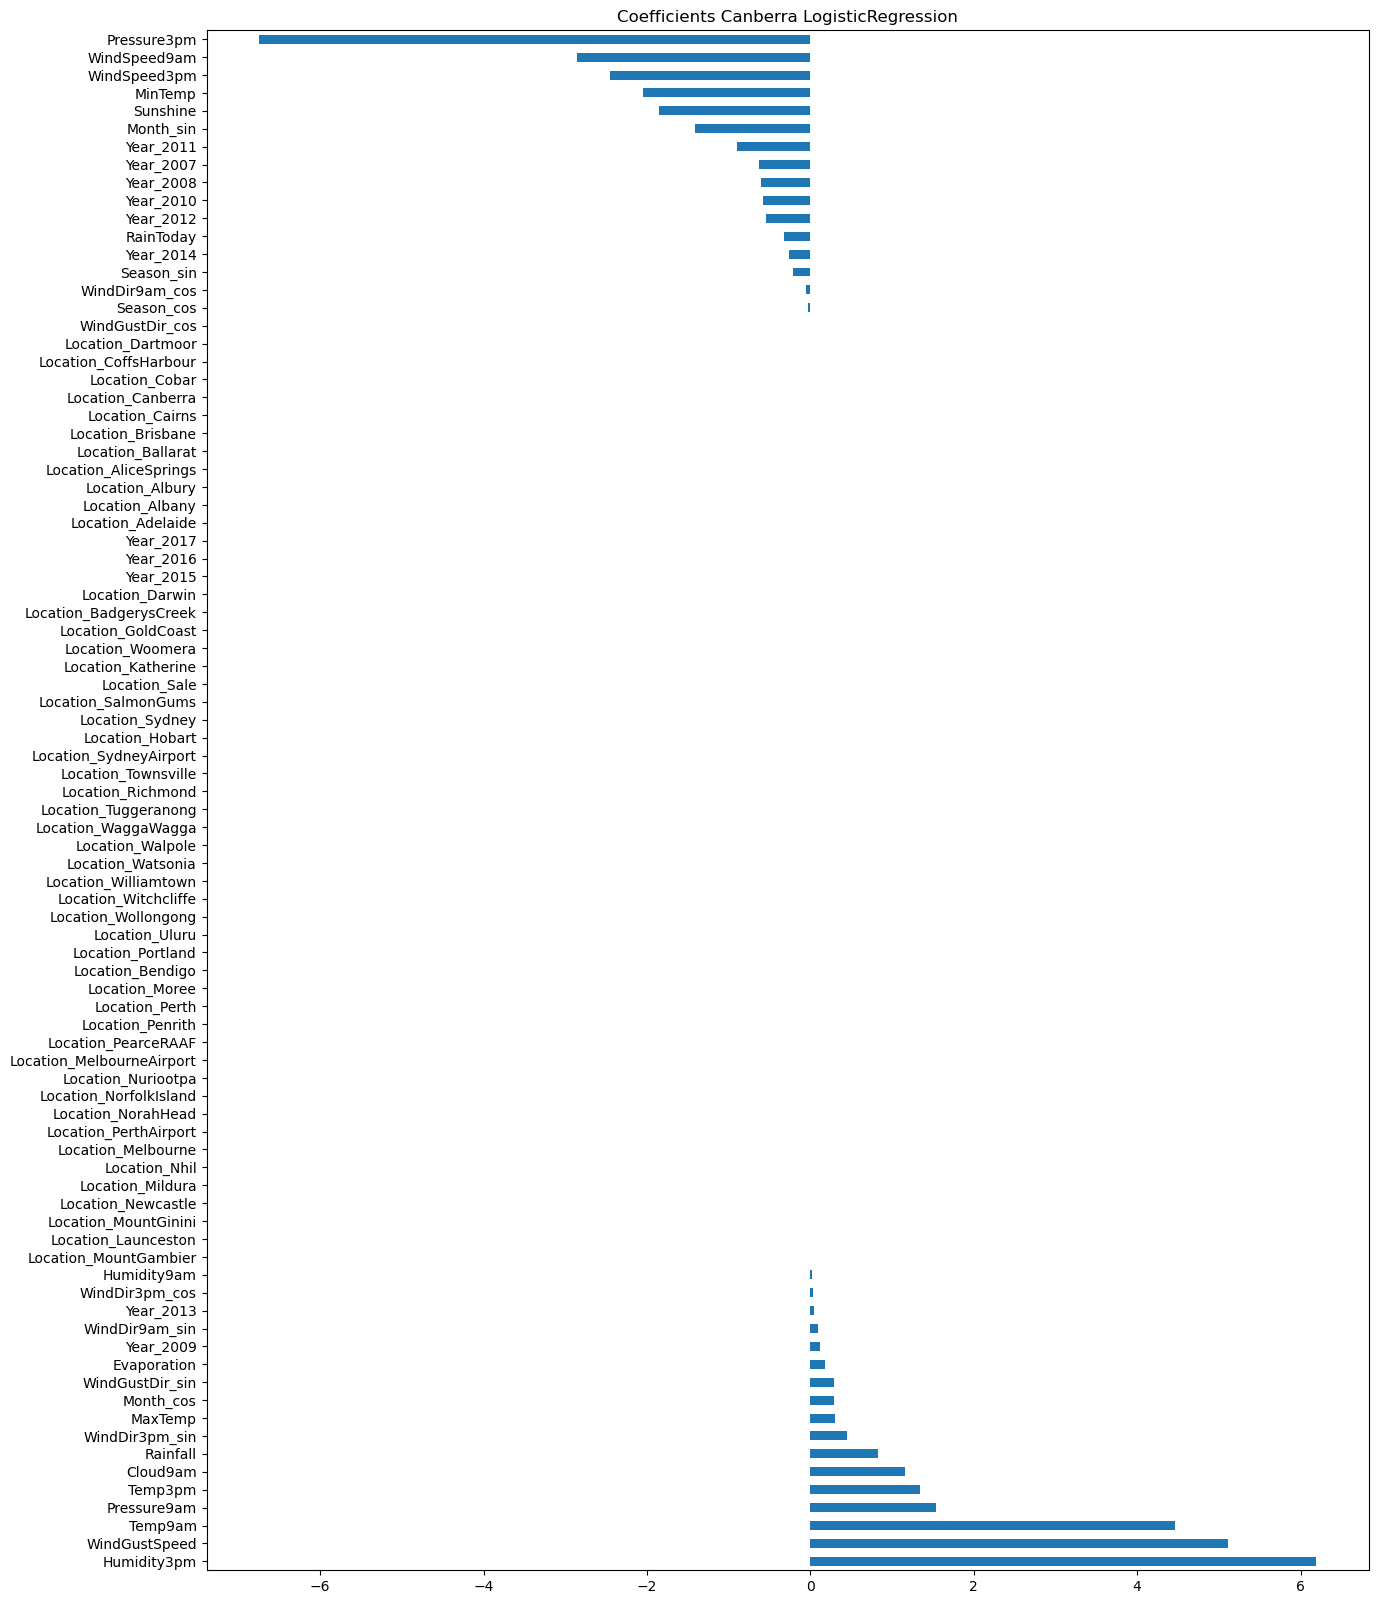

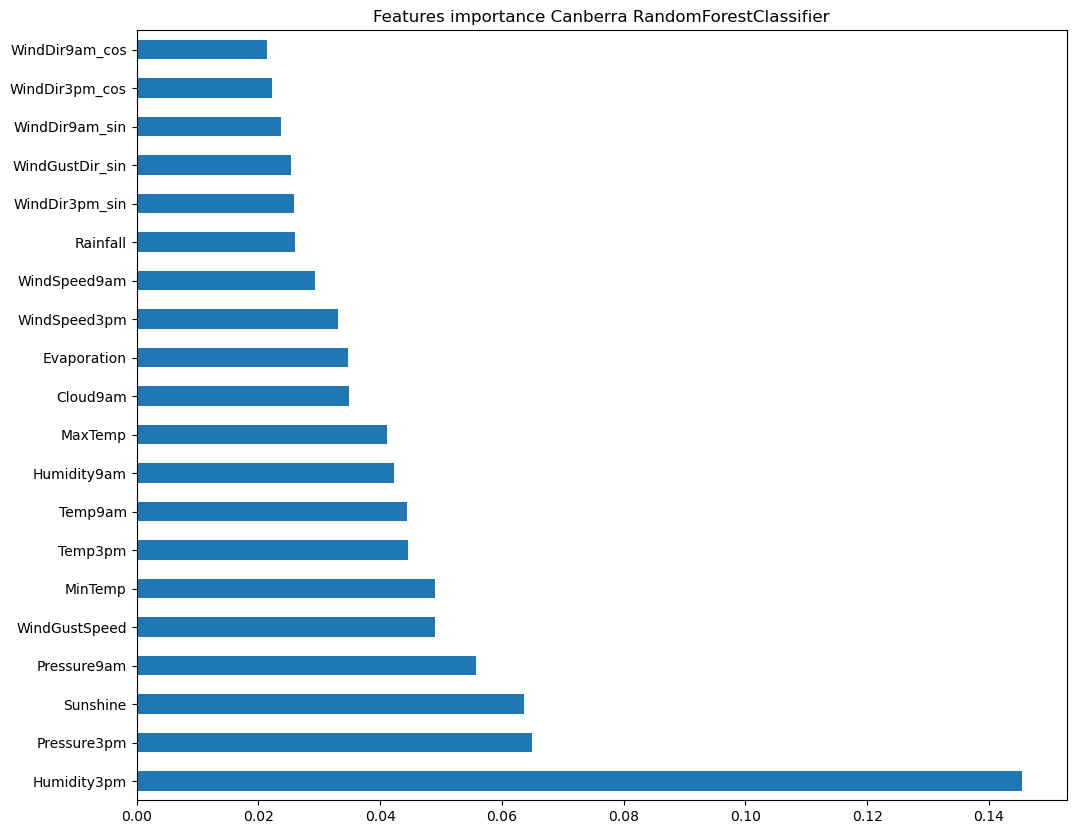

In [3]:
# test 
mf.modeling_location(select_location, df_location, 
                      models_select, 
                      param_grids1, scoring = "accuracy",
                      resampler = SMOTETomek())


In [4]:
# Grosse boucle sur toutes les locations, youhou

location_list = np.unique(df_final.index.get_level_values(0).values)

for select_location in location_list:
    print("DEBUT DE MODELISATION SUR ", select_location)
    df_location =  pd.read_csv("../src/data_location_V2/df_" + select_location + ".csv", index_col=["id_Location","id_Date"])
    mf.modeling_location(select_location, df_location, 
                         models_select, 
                         param_grids1, scoring = "accuracy",
                         resampler = SMOTETomek())


In [5]:
model = RandomForestClassifier()
type(model).__name__

'RandomForestClassifier'